In [1]:
import pandas as pd
import numpy as np
import folium
from shapely.geometry import Point, Polygon

## Read Data

In [2]:
df = pd.read_csv('track_geo.csv', index_col='time', parse_dates=['time'])

In [3]:
df.head()

,time.1,lat,lng,height,dist,dt
time,,,,,,
2015-08-20 06:48:07.235000+03:00,2015-08-20 03:48:07.235,35.015021,32.519585,136.199997,NaN,NaN
2015-08-20 06:48:24.734000+03:00,2015-08-20 03:48:24.734,35.014954,32.519606,126.599998,0.007694,0.004861
2015-08-20 06:48:25.660000+03:00,2015-08-20 03:48:25.660,35.014871,32.519612,123.000000,0.009248,0.000257
2015-08-20 06:48:26.819000+03:00,2015-08-20 03:48:26.819,35.014824,32.519654,120.500000,0.006479,0.000322
2015-08-20 06:48:27.828000+03:00,2015-08-20 03:48:27.828,35.014776,32.519689,118.900002,0.006219,0.000280


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 740 entries, 2015-08-20 06:48:07.235000+03:00 to 2015-08-20 07:20:42.329000+03:00
Data columns (total 6 columns):
time.1    740 non-null object
lat       740 non-null float64
lng       740 non-null float64
height    740 non-null float64
dist      739 non-null float64
dt        739 non-null float64
dtypes: float64(5), object(1)
memory usage: 40.5+ KB


# 1) Create Map

In [19]:
# "m" stands for "map", this is how to start a ap at a certain (mean) point
m = folium.Map(location=[df['lng'].mean(), df['lat'].mean()], zoom_start=15)
m

## Map with Markers

In [22]:
# "m" stands for "map", this is how to start a ap at a certain (mean) point
m = folium.Map(location=[df['lng'].mean(), df['lat'].mean()], zoom_start=15)

# resample data with the mean for every minute of jogging
mdf = df.resample('T').mean()

# # add markers function
def add_marker(row):
    marker = folium.CircleMarker([row['lng'], row['lat']], radius=5, color='red', popup=row.name.strftime('%H:%M'))
    marker.add_to(m)

# run the function on each row (axis 1)
mdf.apply(add_marker, axis=1)

m

# 2) Check for Points Location in a Polygon Area

## Points Basics

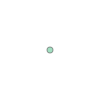

In [6]:
pt = Point(1, 2)
pt

In [23]:
pt.x, pt.y

(1.0, 2.0)

In [8]:
poly = Polygon([[0, 0], [0, 10], [10, 10], [10, 0]])

In [9]:
poly.area

100.0

In [10]:
poly.centroid.xy

(array('d', [5.0]), array('d', [5.0]))

## Check for Intersection

In [11]:
poly.intersects(pt)

True

In [12]:
poly.intersects(Point(10, 20))

False

## Add `Point()` column

In [13]:
mdf['pt'] = mdf[['lng', 'lat']].apply(Point, axis=1)
mdf.head()

,lat,lng,height,dist,dt,pt
time,,,,,,
2015-08-20 06:48:00+03:00,35.014571,32.519485,122.766666,0.005918,0.000728,POINT (32.51948457142857 35.01457057142857)
2015-08-20 06:49:00+03:00,35.014316,32.518971,122.966667,0.005670,0.000748,POINT (32.51897133333333 35.01431633333333)
2015-08-20 06:50:00+03:00,35.014055,32.517258,114.573913,0.012125,0.001328,POINT (32.51725782608697 35.0140552173913)
2015-08-20 06:51:00+03:00,35.013864,32.516264,106.653334,0.005682,0.000556,POINT (32.5162645 35.01386383333332)
2015-08-20 06:52:00+03:00,35.012744,32.515141,97.710000,0.005705,0.000564,POINT (32.51514063333333 35.0127444)


## Example Polygon Relative to Current Points

In [14]:
mean_lng, max_lng = mdf['lng'].mean(), mdf['lng'].max()
mean_lat, max_lat = mdf['lat'].mean(), mdf['lat'].max()

In [15]:
 poly = Polygon([
    [mean_lng, mean_lat],
    [mean_lng, max_lat],
    [max_lng, max_lat],
    [max_lng, mean_lat]
])

In [16]:
# simple polygon exterior gives 2 arrays
poly.exterior.xy

(array('d', [32.5123189947394, 32.5123189947394, 32.51948457142857, 32.51948457142857, 32.5123189947394]),
 array('d', [35.01567806812503, 35.02252776190477, 35.02252776190477, 35.01567806812503, 35.01567806812503]))

In [17]:
# np.stack takes two arrays and places one on top of the other
np.stack(poly.exterior.xy).T

array([[32.51231899, 35.01567807],
       [32.51231899, 35.02252776],
       [32.51948457, 35.02252776],
       [32.51948457, 35.01567807],
       [32.51231899, 35.01567807]])

In [24]:
m = folium.Map(location=[df['lng'].mean(), df['lat'].mean()], zoom_start=15)
mdf = df.resample('T').mean()

# add point info to map
mdf['pt'] = mdf[['lng', 'lat']].apply(Point, axis=1)

def add_marker(row):
    # dots colors change for conditions
    color = 'yellow' if poly.intersects(row['pt']) else 'green'
    marker = folium.CircleMarker([row['lng'], row['lat']], radius=5, color='red', popup=row.name.strftime('%H:%M'), fill_color=color)
    marker.add_to(m)
    # add the polygon drawing on map
    m.add_child(folium.PolyLine(np.stack(poly.exterior.xy).T, color='yellow'))

mdf.apply(add_marker, axis=1)

m